In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display


In [2]:
df = pd.read_csv('weather - 286_40.75_t2m_1d.csv')
df


,time,longitude,latitude,Ktemp
0,1950-01-01 9:00:00,286,40.75,274.39734
1,1950-01-02 9:00:00,286,40.75,277.07593
2,1950-01-03 9:00:00,286,40.75,280.80090
3,1950-01-04 9:00:00,286,40.75,287.14010
4,1950-01-05 9:00:00,286,40.75,285.65262
...,...,...,...,...
26293,2021-12-27 9:00:00,286,40.75,276.51580
26294,2021-12-28 9:00:00,286,40.75,276.98850
26295,2021-12-29 9:00:00,286,40.75,278.83975
26296,2021-12-30 9:00:00,286,40.75,279.89480


In [3]:
df['Ftemp'] = (df['Ktemp'] - 273.15) * 9/5 + 32

# Convert time column to datetime
df['Datetime'] = pd.to_datetime(df['time'])

# Extract year and month
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month

df


,time,longitude,latitude,Ktemp,Ftemp,Datetime,Year,Month
0,1950-01-01 9:00:00,286,40.75,274.39734,34.245212,1950-01-01 09:00:00,1950,1
1,1950-01-02 9:00:00,286,40.75,277.07593,39.066674,1950-01-02 09:00:00,1950,1
2,1950-01-03 9:00:00,286,40.75,280.80090,45.771620,1950-01-03 09:00:00,1950,1
3,1950-01-04 9:00:00,286,40.75,287.14010,57.182180,1950-01-04 09:00:00,1950,1
4,1950-01-05 9:00:00,286,40.75,285.65262,54.504716,1950-01-05 09:00:00,1950,1
...,...,...,...,...,...,...,...,...
26293,2021-12-27 9:00:00,286,40.75,276.51580,38.058440,2021-12-27 09:00:00,2021,12
26294,2021-12-28 9:00:00,286,40.75,276.98850,38.909300,2021-12-28 09:00:00,2021,12
26295,2021-12-29 9:00:00,286,40.75,278.83975,42.241550,2021-12-29 09:00:00,2021,12
26296,2021-12-30 9:00:00,286,40.75,279.89480,44.140640,2021-12-30 09:00:00,2021,12


In [4]:
# Calculate average monthly temp (for every month of every year)
monthly_avg_temp = df.groupby(['Year', 'Month'])['Ftemp'].mean().reset_index()

monthly_avg_temp

,Year,Month,Ftemp
0,1950,1,39.994274
1,1950,2,31.838770
2,1950,3,35.444411
3,1950,4,47.381065
4,1950,5,57.668071
...,...,...,...
859,2021,8,76.812806
860,2021,9,70.573598
861,2021,10,61.972971
862,2021,11,45.969692


In [5]:
# # Plotting for a specific year
# def plot_yearly_temps(year):
#     plt.figure(figsize=(10, 6))
#     sns.lineplot(data=monthly_avg_temp[monthly_avg_temp['Year'] == year], x='Month', y='Ftemp', marker='o')
#     plt.title(f'Average Monthly Temperature in {year}')
#     plt.xlabel('Month')
#     plt.ylabel('Temperature (°F)')
#     plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#     plt.grid(True)
#     plt.show()

# plot_yearly_temps(2000)  # Test


In [6]:
# Function to plot average monthly temp for a selected year
def plot_yearly_temps(year):
    plt.figure(figsize=(10, 6))
    yearly_data = monthly_avg_temp[monthly_avg_temp['Year'] == year]
    sns.lineplot(data=yearly_data, x='Month', y='Ftemp', marker='o', linestyle='-')
    plt.title(f'Average Monthly Temperature in {year}')
    plt.xlabel('Month')
    plt.ylabel('Temperature (°F)')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.show()

# Slider for year selection
year_slider = widgets.IntSlider(
    value=monthly_avg_temp['Year'].min(),
    min=monthly_avg_temp['Year'].min(),
    max=monthly_avg_temp['Year'].max(),
    step=1,
    description='Year:',
    continuous_update=False
)

# Widget to interactively plot (use ipywidgets)
widgets.interact(plot_yearly_temps, year=year_slider)


interactive(children=(IntSlider(value=1950, continuous_update=False, description='Year:', max=2021, min=1950),…

<function __main__.plot_yearly_temps(year)>

In [7]:
# Calculate average annual temp
annual_avg_temp = df.groupby('Year')['Ftemp'].mean().reset_index()

annual_avg_temp


,Year,Ftemp
0,1950,52.776070
1,1951,53.822162
2,1952,54.372742
3,1953,55.295208
4,1954,53.463150
...,...,...
67,2017,55.456930
68,2018,54.944623
69,2019,54.809348
70,2020,56.145076


In [8]:
# Identify the first year above 55F
first_year = annual_avg_temp[annual_avg_temp['Ftemp'] > 55].iloc[0]

first_year 

Year     1953.000000
Ftemp      55.295208
Name: 3, dtype: float64

In [9]:
print(f"The first year where the average temperature passes 55 degrees is {int(first_year['Year'])}, with an average temperature of {first_year['Ftemp']}°F.")


The first year where the average temperature passes 55 degrees is 1953, with an average temperature of 55.29520794520552°F.


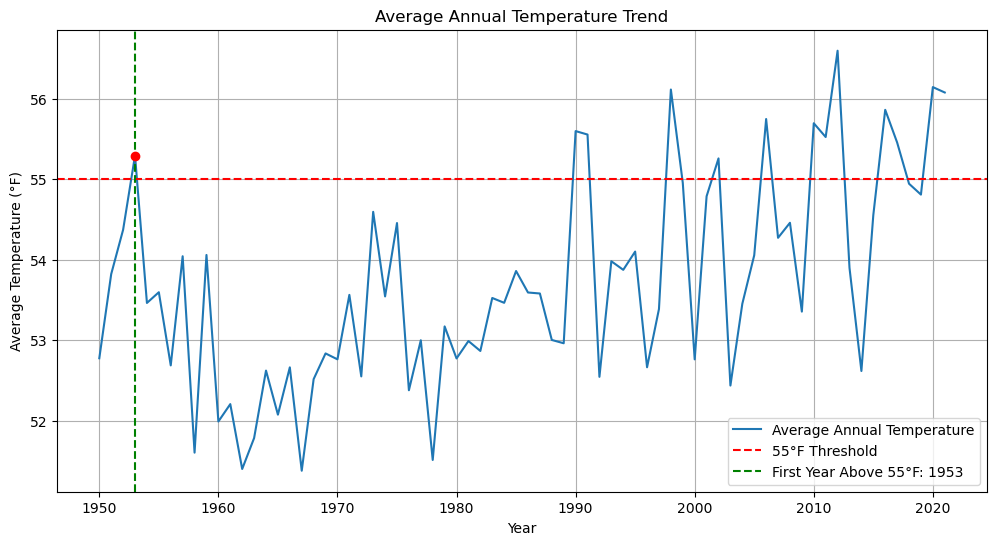

In [10]:
# Plotting annual_avg_temp
plt.figure(figsize=(12, 6))
plt.plot(annual_avg_temp['Year'], annual_avg_temp['Ftemp'], label='Average Annual Temperature')

# Highlighting the first year above 55F
plt.axhline(y=55, color='r', linestyle='--', label='55°F Threshold')
plt.axvline(x=first_year['Year'], color='green', linestyle='--', label=f'First Year Above 55°F: {int(first_year["Year"])}')

plt.scatter(first_year['Year'], first_year['Ftemp'], color='red', zorder=5)  # To highlight the specific point

plt.title('Average Annual Temperature Trend')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°F)')
plt.legend()
plt.grid(True)

plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


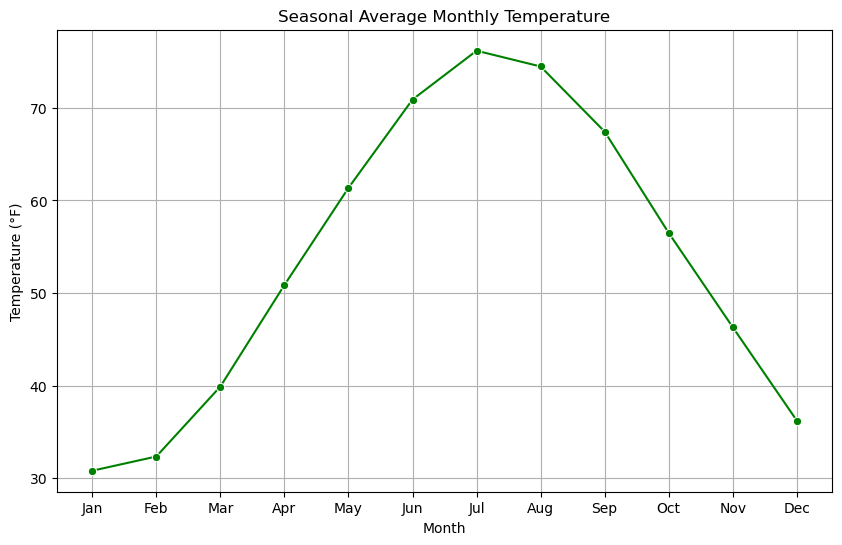

In [11]:
# Calculate average temp for each month across all years
seasonal_avg_temp = df.groupby('Month')['Ftemp'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=seasonal_avg_temp, x='Month', y='Ftemp', marker='o', color='green')
plt.title('Seasonal Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°F)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


In [12]:
# Compute the long-term average temperature for reference
long_term_avg = df['Ftemp'].mean()

# Categorize data into decades for easier comparison
df['decade'] = (df['Year'] // 10) * 10

# Calculate the average temperature for each decade
decade_avg_temp = df.groupby('decade')['Ftemp'].mean().reset_index()

decade_avg_temp


,decade,Ftemp
0,1950,53.571878
1,1960,52.147543
2,1970,53.153036
3,1980,53.261765
4,1990,54.276956
5,2000,54.058787
6,2010,54.997013
7,2020,56.111629


In [13]:
# Identify extreme temperature events - for simplicity, we define extremes as temperatures in the top or bottom 10%
quantiles = df['Ftemp'].quantile([0.1, 0.9])
lower_extreme = quantiles[0.1]
upper_extreme = quantiles[0.9]
extremes = df[(df['Ftemp'] <= lower_extreme) | (df['Ftemp'] >= upper_extreme)]

extremes

,time,longitude,latitude,Ktemp,Ftemp,Datetime,Year,Month,decade
7,1950-01-08 9:00:00,286,40.75,270.43380,27.110840,1950-01-08 09:00:00,1950,1,1950
8,1950-01-09 9:00:00,286,40.75,270.39838,27.047084,1950-01-09 09:00:00,1950,1,1950
19,1950-01-20 9:00:00,286,40.75,269.56607,25.548926,1950-01-20 09:00:00,1950,1,1950
20,1950-01-21 9:00:00,286,40.75,271.04358,28.208444,1950-01-21 09:00:00,1950,1,1950
27,1950-01-28 9:00:00,286,40.75,272.31802,30.502436,1950-01-28 09:00:00,1950,1,1950
...,...,...,...,...,...,...,...,...,...
26174,2021-08-30 9:00:00,286,40.75,298.15643,77.011574,2021-08-30 09:00:00,2021,8,2020
26175,2021-08-31 9:00:00,286,40.75,299.12840,78.761120,2021-08-31 09:00:00,2021,8,2020
26188,2021-09-13 9:00:00,286,40.75,298.28162,77.236916,2021-09-13 09:00:00,2021,9,2020
26190,2021-09-15 9:00:00,286,40.75,297.75284,76.285112,2021-09-15 09:00:00,2021,9,2020


In [14]:
import plotly.express as px

# Decadal trend line plot
fig = px.line(decade_avg_temp, x='decade', y='Ftemp', labels={'Ftemp':'Avg Temperature (°F)', 'decade':'Decade'}, title='Decadal Temperature Trends')

# Add scatter plot for extreme temperature events
fig.add_scatter(x=extremes['Year'], y=extremes['Ftemp'], mode='markers', name='Extreme Temperatures', marker=dict(color='red'))

# Highlight the long-term average temperature
fig.add_hline(y=long_term_avg, line_dash="dot", annotation_text="Long-term Average", line_color="grey")

fig.show()


In [15]:
# df.to_csv('./df_weather.csv', index=False)

In [16]:
# import dash
# from dash import dcc, html
# from dash.dependencies import Input, Output
# import plotly.express as px
# import pandas as pd

# app = dash.Dash(__name__)

# # Creating a simple layout with a dropdown for selecting years and a graph to display temperatures
# app.layout = html.Div([
#     dcc.Dropdown(
#         id='year-dropdown',
#         options=[{'label': year, 'value': year} for year in df['Year'].unique()],
#         value=df['Year'].min()  # Default value
#     ),
#     dcc.Graph(id='temp-graph')
# ])

# @app.callback(
#     Output('temp-graph', 'figure'),
#     [Input('year-dropdown', 'value')]
# )
# def update_graph(selected_year):
#     filtered_data = df[df['Year'] == selected_year]
#     fig = px.line(filtered_data, x='Month', y='Ftemp', title=f'Average Monthly Temperature in {selected_year}')
#     return fig

# if __name__ == '__main__':
#     app.run_server(debug=True)
